In [110]:
## what effect does time have on location, district, race, age 

In [111]:
import pandas as pd
from lib import standardize_item_numbers
import numpy as np
from matplotlib import pyplot as plt

In [112]:
def clean():
    dfa = pd.read_csv("../data/electronic_police_report_2018_2022.csv")
    dfa = dfa.pipe(standardize_item_numbers, ["item_number"])

    dfb = pd.read_csv("../data/rtcc.csv")
    dfb["footage_requested"] = "1"
    dfb = dfb.pipe(standardize_item_numbers, ["item_number"])

    df = pd.merge(dfa, dfb, on="item_number")
    return df

In [113]:
df = clean()

C:\Users\PC\AppData\Local\Temp\ipykernel_15952\656361857.py:2: DtypeWarning: Columns (14,20,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dfa = pd.read_csv("../data/electronic_police_report_2018_2022.csv")


In [114]:
df.item_number.unique()

array(['d2348218', 'e1397518', 'd3450118', ..., 'g2244222', 'j2313722',
       'g3060822'], dtype=object)

In [115]:
df = df.drop_duplicates(subset=["offender_race", "offender_gender", "item_number"])

In [116]:
df.shape

(310812, 26)

In [117]:
datetimes = (df.occurred_date_time.str.replace(r"(\w{4})-(\w{1,2})-(\w{1,2})", r"\2/\3/\1").str.extract(r"(\w{2}):(\w{2}):?(\w{2})?"))
df.loc[:, "occurred_datetime"] = datetimes[0]
df = df[~((df.occurred_datetime.fillna("") == ""))]
df.loc[:, "occurred_datetime"] = df.occurred_datetime.astype(int)

hours = df[["occurred_datetime"]]

C:\Users\PC\AppData\Local\Temp\ipykernel_15952\755620423.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  datetimes = (df.occurred_date_time.str.replace(r"(\w{4})-(\w{1,2})-(\w{1,2})", r"\2/\3/\1").str.extract(r"(\w{2}):(\w{2}):?(\w{2})?"))


In [118]:
times = np.array(hours)

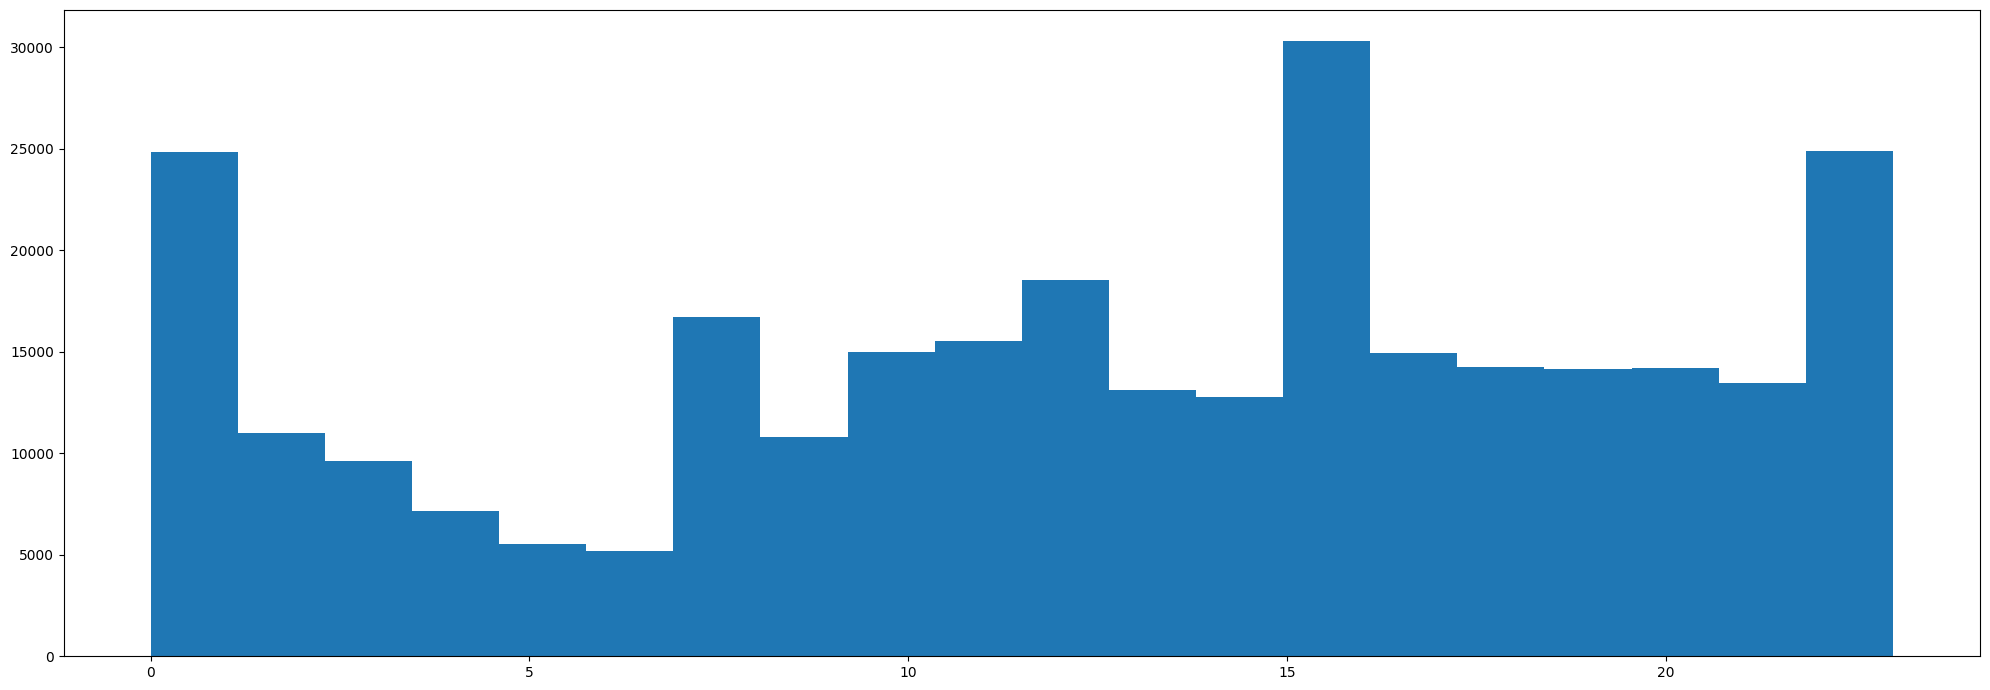

In [119]:
fig, ax = plt.subplots(figsize =(20,7), tight_layout = True, alpha=0.5, edgecolor = 'black')
ax.hist(hours, bins =20)
 
# Show plot
plt.show()